## Data Cleaning and EDA

In [2]:
#Import required libraries for starting the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the dataset
df = pd.read_csv(r"H:\VizCraft_Hackathon\global-data-on-sustainable-energy.csv")
#Converting column names to camelCase
df.columns = [col if '_' not in col else ''.join(x.capitalize() or '_' for x in col.split('_')) for col in df.columns]
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),ValueCo2EmissionsKtByCountry,Renewables (% equivalent primary energy),GdpGrowth,GdpPerCapita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [4]:
#Get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
#Check number of cuntries
print(f"There are {df.Entity.nunique()} countries in this datsets")

There are 176 countries in this datsets


In [9]:
#Check number of missing values
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
ValueCo2EmissionsKtByCountry                       

<AxesSubplot:>

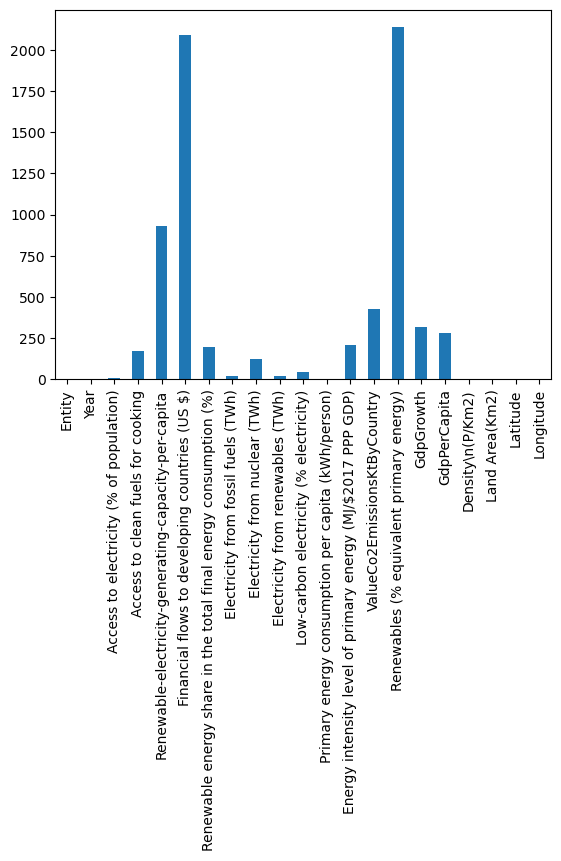

In [7]:
#Plot N/A variables
df.isna().sum().plot(kind = 'bar')

In [10]:
#Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]
duplicate_rows.shape

(0, 21)

In [11]:
#Percentage of missing values in our dataset
(((df.isna().sum())/df.shape[0])*100).sort_values(ascending = False)

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
ValueCo2EmissionsKtByCountry                                        11.729241
GdpGrowth                                                            8.687312
GdpPerCapita                                                         7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

In [12]:
#Drop columns with more than 25% missing values
df.drop(['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)', 'Renewable-electricity-generating-capacity-per-capita'], axis = 1, inplace = True)

In [13]:
#Check again our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3628 non-null   float64
 6   Electricity from nuclear (TWh)                                    3523 non-null   float64
 7   Electricity from renewables (TWh)

In [14]:
#fill remaining missing values with mean value of that column
# Select only numeric columns
numColumns = df.select_dtypes(include='number').columns

# Fill missing values with the mean of numeric columns
df[numColumns] = df[numColumns].fillna(df[numColumns].mean())


In [15]:
#Check again percentage of missing values in our dataset
(((df.isna().sum())/df.shape[0])*100).sort_values(ascending=False)

Density\n(P/Km2)                                                    0.027405
Entity                                                              0.000000
Year                                                                0.000000
Latitude                                                            0.000000
Land Area(Km2)                                                      0.000000
GdpPerCapita                                                        0.000000
GdpGrowth                                                           0.000000
ValueCo2EmissionsKtByCountry                                        0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.000000
Primary energy consumption per capita (kWh/person)                  0.000000
Low-carbon electricity (% electricity)                              0.000000
Electricity from renewables (TWh)                                   0.000000
Electricity from nuclear (TWh)                                      0.000000

In [16]:
# Export the cleaned DataFrame to a new CSV file
df.to_csv(r"H:\VizCraft_Hackathon\cleanedData.csv", index=False)

# Data Analysis and Visualization

In [17]:
#Ten countries with higher GDP in the year 2010
topTenGDP = df[df['Year'] == 2010].sort_values(by='GdpPerCapita', ascending = False)[['Year', 'Entity', 'GdpPerCapita']][0:10]
topTenGDP

,Year,Entity,GdpPerCapita
1964,2010,Luxembourg,110777.90790
409,2010,Bermuda,101875.28410
2482,2010,Norway,87693.79007
3218,2010,Switzerland,77117.12601
640,2010,Cayman Islands,73351.75677
2713,2010,Qatar,67403.08768
913,2010,Denmark,58041.39844
3197,2010,Sweden,52869.04429
178,2010,Australia,52087.97229
2335,2010,Netherlands,50950.03434


[Text(0.5, 0, 'Country name'),
 Text(0, 0.5, 'GDP per Capita ($)'),
 Text(0.5, 1.0, 'Ten countries with highest GDP in the year 2010')]

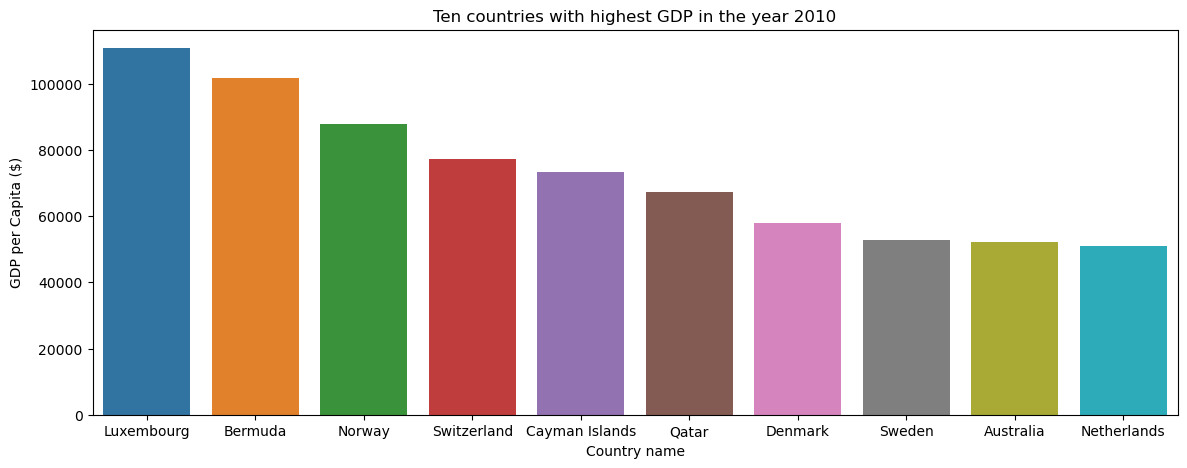

In [19]:
#Plot ten countries with highest GDP in the year 2010
plt.figure(figsize=(14, 5))
sns.barplot(x= 'Entity', y = 'GdpPerCapita', data = topTenGDP).set(xlabel ="Country name", ylabel = "GDP per Capita ($)", title='Ten countries with highest GDP in the year 2010')

In [26]:
#The GDP per Capita change in all years of Luxembourg
BurundiGdp = df[df['Entity'] == 'Burundi'].sort_values(by='Year', ascending = True)[['Year', 'Entity', 'GdpPerCapita']]
BurundiGdp.head()


,Year,Entity,GdpPerCapita
546,2000,Burundi,136.463971
547,2001,Burundi,134.363427
548,2002,Burundi,123.117536
549,2003,Burundi,113.567251
550,2004,Burundi,128.336703


In [27]:
BurundiGdp = df[df['Entity'] == 'Burundi'].sort_values(by='Year', ascending = True)[['Year', 'Entity', 'GdpPerCapita']]
BurundiGdp.head()

,Year,Entity,GdpPerCapita
546,2000,Burundi,136.463971
547,2001,Burundi,134.363427
548,2002,Burundi,123.117536
549,2003,Burundi,113.567251
550,2004,Burundi,128.336703


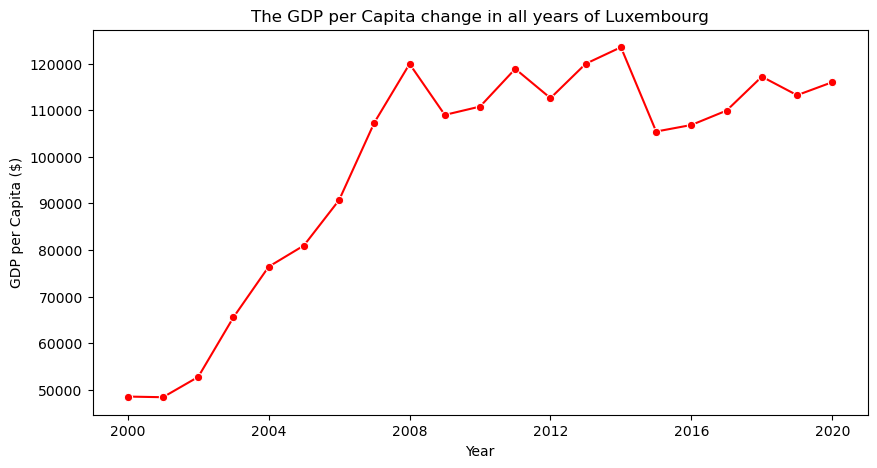

In [28]:
#Plot the GDP per Capita change in all years of Qatar (Example)
fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(x= 'Year', y = 'GdpPerCapita', data = LuxembourgGdp, marker = 'o', color = 'r').set(xlabel ="Year", ylabel = "GDP per Capita ($)", title='The GDP per Capita change in all years of Luxembourg')
ax.set_xticks(LuxembourgGdp.Year[::4])

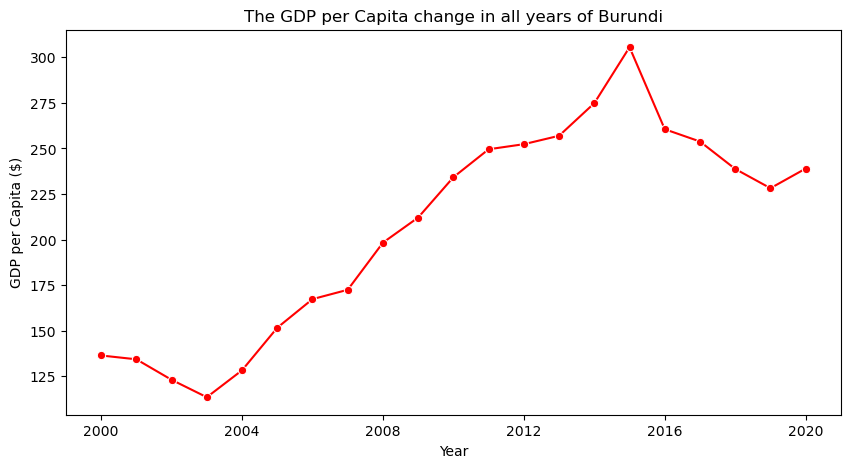

In [30]:
#Plot the GDP per Capita change in all years of Qatar (Example)
fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(x= 'Year', y = 'GdpPerCapita', data = BurundiGdp, marker = 'o', color = 'r').set(xlabel ="Year", ylabel = "GDP per Capita ($)", title='The GDP per Capita change in all years of Burundi')
ax.set_xticks(BurundiGdp.Year[::4])